# Counties

This notebook accompanies chapter 10 of the monograph [Minimum-Distortion Embedding](https://web.stanford.edu/~boyd/papers/min_dist_emb.html).

In this eample notebook, we'll use PyMDE to embed and visualize 3,220 US counties, described by their demographic data (collected between 2013-2017 by an ACS longitudinal survey).

We'll then color each county by the fraction of voters who voted for a democratic candidate in the 2016 presidential election. Interestingly, the embedding vaguely resembles a map of the US, though no geographic data was used to compute the embedding.

In [1]:
import pymde

In [2]:
dataset = pymde.datasets.counties()

Mar 25 09:16:27 AM: Loading cached dataset.


Below is the raw dataframe, which was preprocessed using the code in scripts/preprocess_county_data.ipynb.

The preprocessed data is stored in dataset.data

In [3]:
dataset.county_dataframe

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja Municipio,54754,26269,28485,96.7,3.1,0.1,0.0,...,1.4,0.6,0.9,31.6,14234,76.2,19.3,4.3,0.2,16.8
3216,72147,Puerto Rico,Vieques Municipio,8931,4351,4580,95.7,4.0,0.0,0.0,...,5.0,0.0,1.7,14.9,2927,40.7,40.9,18.4,0.0,12.8
3217,72149,Puerto Rico,Villalba Municipio,23659,11510,12149,99.7,0.2,0.1,0.0,...,2.1,0.0,2.8,28.4,6873,59.2,30.2,10.4,0.2,24.8
3218,72151,Puerto Rico,Yabucoa Municipio,35025,16984,18041,99.9,0.1,0.0,0.0,...,1.4,1.8,0.1,30.5,7878,62.7,30.9,6.3,0.0,25.4


We now make a neighbor-preserving embedding, to explore the local relationships in the data.

In [4]:
mde = pymde.preserve_neighbors(data=dataset.data, verbose=True)

Mar 25 09:16:27 AM: Computing 15-nearest neighbors, with max_distance=None
Mar 25 09:16:36 AM: Exact nearest neighbors by brute force 
Mar 25 09:16:36 AM: Computing quadratic initialization.


In [5]:
embedding = mde.embed()

Finally we visualize the embedding, rotating it so that it vaguely resembles a map of the US.

Note that counties that voted Republican tend to cluster together, as do counties that voted Democratic.

<AxesSubplot:>

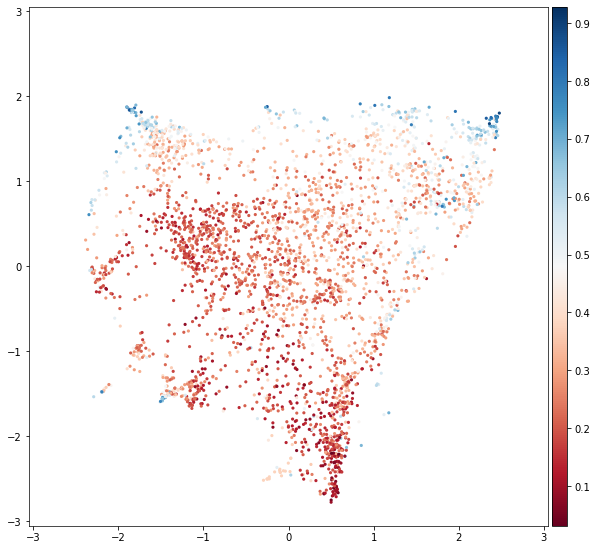

In [6]:
# Rotate the embedding by some amount of degrees
rotated_embedding = pymde.rotate(embedding, -30.)
pymde.plot(rotated_embedding, color_by=dataset.attributes['democratic_fraction'], color_map="RdBu", marker_size=10)